In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("C:\\Users\\nafna\\Downloads\\train_ctrUa4K.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
duplicated_rows=data.duplicated()
duplicated_rows.sum()

np.int64(0)

In [5]:
data=data[~duplicated_rows]

In [6]:
duplicated_rows=data.duplicated()
duplicated_rows.sum()

np.int64(0)

In [7]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

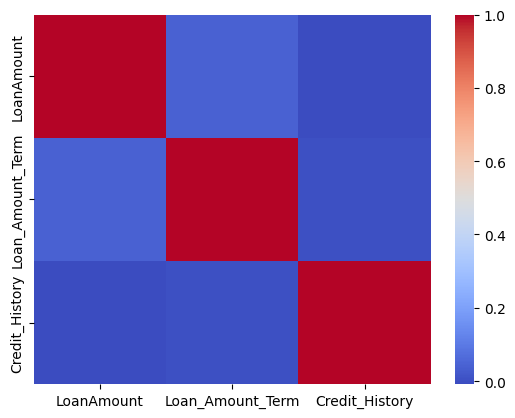

In [8]:
num_col = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
sns.heatmap(data[num_col].corr(),annot=False,cmap="coolwarm")

In [9]:
data[num_col].isna().sum()

LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

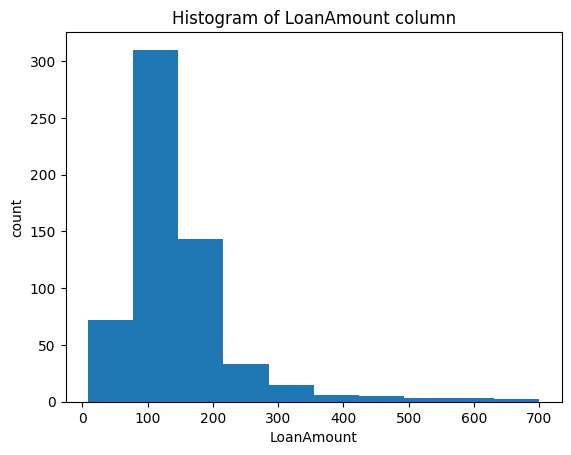

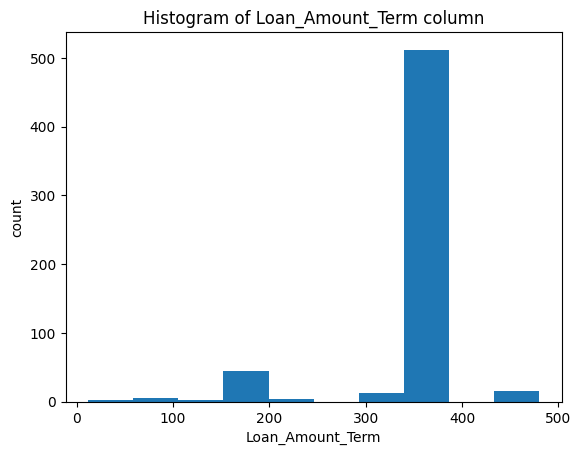

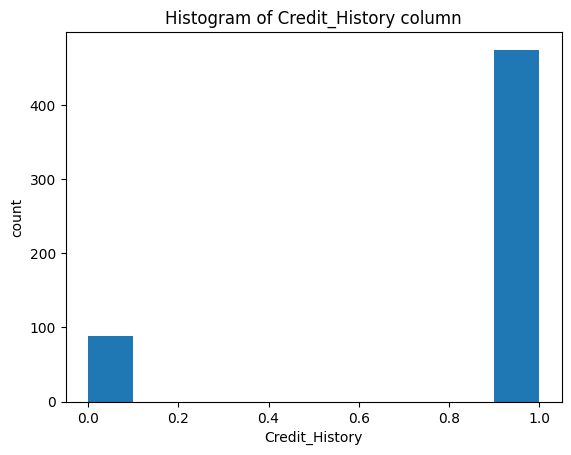

In [10]:
for col in num_col:
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [11]:
for col in num_col:
    data[col]=data[col].fillna(data[col].median())

In [12]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
cat_col = ("Gender", "Married", "Dependents", "Self_Employed")
for col in cat_col:
    data[col]=data[col].fillna(data[col].mode()[0])

In [14]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## SCALING

#### MIN-MAX SCALING

In [16]:
for col in num_col:
    data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())

In [17]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.172214,0.74359,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,0.172214,0.74359,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.082489,0.74359,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,0.160637,0.74359,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,0.191027,0.74359,1.0,Urban,Y


## ENCODING

In [18]:
data['Dependents'] = data['Dependents'] .replace('3+','4').astype(int)

In [19]:
data['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [20]:
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [21]:
data['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [22]:
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})

In [23]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [24]:
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [25]:
data['Self_Employed'].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [26]:
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})

In [27]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
data['Property_Area'] = data['Property_Area'].map({'Semiurban': 1, 'Urban': 2, 'Rural': 3})

In [29]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [30]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [31]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,0.172214,0.743590,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,0.172214,0.743590,1.0,3,0
2,LP001005,0,1,0,1,1,3000,0.0,0.082489,0.743590,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,0.160637,0.743590,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,0.089725,0.743590,1.0,3,1
610,LP002979,0,1,4,1,0,4106,0.0,0.044863,0.358974,1.0,3,1
611,LP002983,0,1,1,1,0,8072,240.0,0.353111,0.743590,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,0.257598,0.743590,1.0,2,1


In [32]:
data = data.drop('Loan_ID', axis=1) #dropping load id

In [33]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,0.172214,0.743590,1.0,2,1
1,0,1,1,1,0,4583,1508.0,0.172214,0.743590,1.0,3,0
2,0,1,0,1,1,3000,0.0,0.082489,0.743590,1.0,2,1
3,0,1,0,0,0,2583,2358.0,0.160637,0.743590,1.0,2,1
4,0,0,0,1,0,6000,0.0,0.191027,0.743590,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,0.089725,0.743590,1.0,3,1
610,0,1,4,1,0,4106,0.0,0.044863,0.358974,1.0,3,1
611,0,1,1,1,0,8072,240.0,0.353111,0.743590,1.0,2,1
612,0,1,2,1,0,7583,0.0,0.257598,0.743590,1.0,2,1


### Train-Test Split

In [34]:
y=data["Loan_Status"]
X=data.drop("Loan_Status",axis=1)

In [35]:
#X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,0,1,0,1,0,6000,2250.0,0.370478,0.743590,1.0,1
90,0,1,0,1,0,2958,2900.0,0.176556,0.743590,1.0,1
227,0,1,2,1,0,6250,1695.0,0.290883,0.743590,1.0,1
482,0,1,0,1,0,2083,3150.0,0.172214,0.743590,1.0,1
464,0,0,0,1,0,4166,0.0,0.128799,0.743590,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,2,0,1,1875,1875.0,0.127352,0.743590,1.0,1
106,0,1,2,1,0,11417,1126.0,0.312590,0.743590,1.0,2
270,1,0,0,1,0,3237,0.0,0.030391,0.743590,1.0,2
435,1,1,0,1,0,10047,0.0,0.172214,0.487179,1.0,1


## Logistic Regression

In [36]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_lg=model.predict(X_test)

c:\Users\nafna\OneDrive\Documents\sample_project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred_lg))
print("Precision:", precision_score(y_test, y_pred_lg))  
print("Recall:", recall_score(y_test, y_pred_lg))       
print("F1 Score:", f1_score(y_test, y_pred_lg))

Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1 Score: 0.8586956521739131


## KNN

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred_kn = knn.predict(X)

In [39]:
accuracy = accuracy_score(y,y_pred_kn)
precision = precision_score(y,y_pred_kn)
recall = recall_score(y,y_pred_kn)
f1 = f1_score(y,y_pred_kn)

In [40]:
print("Accuracy:", accuracy_score(y, y_pred_kn))
print("Precision:", precision_score(y, y_pred_kn))  
print("Recall:", recall_score(y, y_pred_kn))       
print("F1 Score:", f1_score(y, y_pred_kn))  

Accuracy: 0.7345276872964169
Precision: 0.7534246575342466
Recall: 0.9123222748815166
F1 Score: 0.8252947481243301


## Naive Bayes

In [41]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred_nb = naive_bayes.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))  
print("Recall:", recall_score(y_test, y_pred_nb))       
print("F1 Score:", f1_score(y_test, y_pred_nb))  

Accuracy: 0.7804878048780488
Precision: 0.7572815533980582
Recall: 0.975
F1 Score: 0.8524590163934426


## DECISION TREE

In [43]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

In [44]:
print('Accuracy is: ',accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))  
print("Recall :", recall_score(y_test, y_pred_dt))       
print("F1 Score:", f1_score(y_test, y_pred_dt))       
   

Accuracy is:  0.6991869918699187
Precision: 0.7415730337078652
Recall : 0.825
F1 Score: 0.7810650887573964


### Random Forest

In [45]:
rt_clf = RandomForestClassifier()
rt_clf.fit(X_train, y_train)
y_pred_rf = dt_clf.predict(X_test)

In [46]:
print('Accuracy : ',accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))  
print("Recall :", recall_score(y_test, y_pred_rf))       
print("F1 Score:", f1_score(y_test, y_pred_rf))       
   

Accuracy :  0.6991869918699187
Precision: 0.7415730337078652
Recall : 0.825
F1 Score: 0.7810650887573964


# Test Data

In [47]:
data = pd.read_csv("C:\\Users\\nafna\\Downloads\\test_lAUu6dG.csv")

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
duplicated_rows=data.duplicated()
duplicated_rows.sum()

np.int64(0)

In [50]:
data=data[~duplicated_rows]

In [51]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

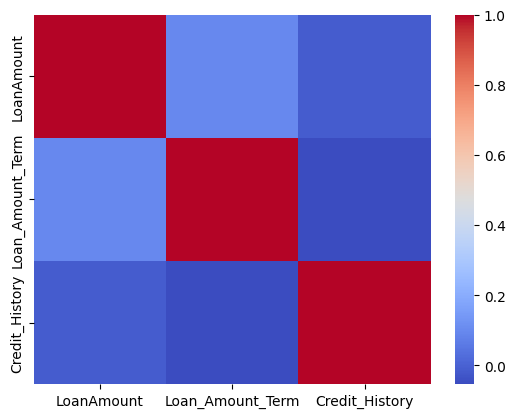

In [52]:
num_col = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
sns.heatmap(data[num_col].corr(),annot=False,cmap="coolwarm")

In [53]:
data[num_col].isna().sum()

LoanAmount           5
Loan_Amount_Term     6
Credit_History      29
dtype: int64

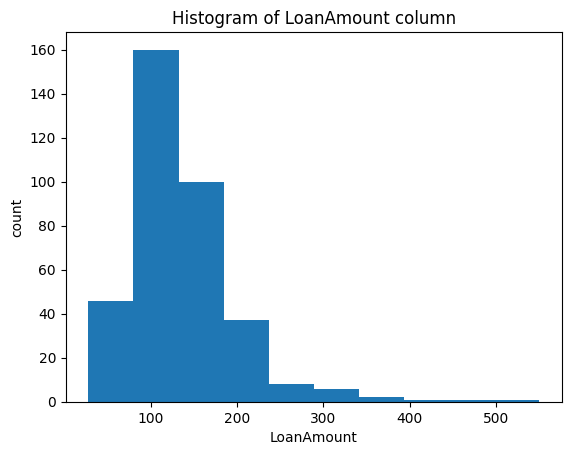

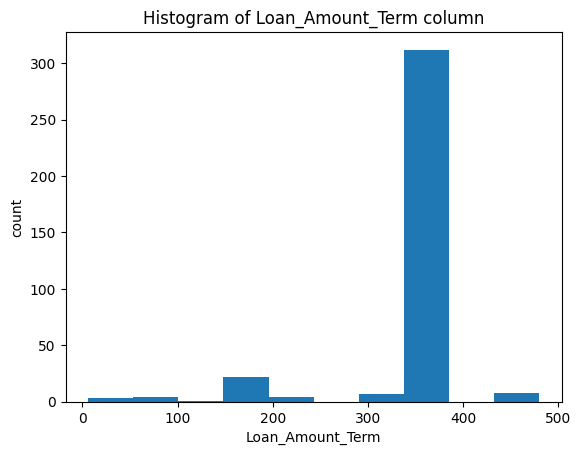

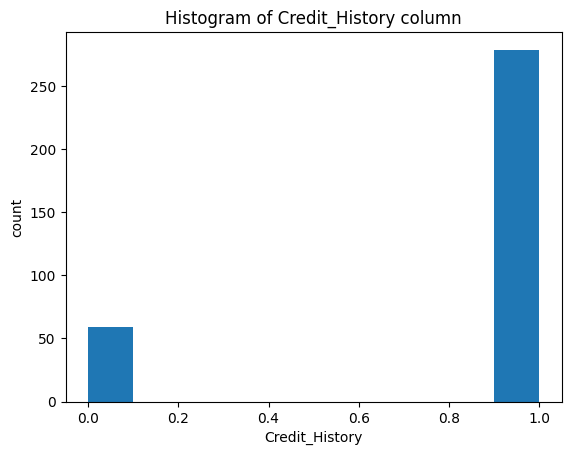

In [54]:
for col in num_col:
    plt.hist(data[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [55]:
for col in num_col:
    data[col]=data[col].fillna(data[col].median())

In [56]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [57]:
cat_col = ("Gender", "Dependents", "Self_Employed")
for col in cat_col:
    data[col]=data[col].fillna(data[col].mode()[0])

In [58]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [59]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Scaling

In [60]:
for col in num_col:
    data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())

In [61]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,0.157088,0.746835,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,0.187739,0.746835,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,0.344828,0.746835,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,0.137931,0.746835,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,0.095785,0.746835,1.0,Urban


### Encoding

In [62]:
data['Dependents'] = data['Dependents'] .replace('3+','4').astype(int)

In [63]:
data['Gender'].value_counts()

Gender
Male      297
Female     70
Name: count, dtype: int64

In [64]:
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})

In [65]:
data['Married'].value_counts()

Married
Yes    233
No     134
Name: count, dtype: int64

In [66]:
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})

In [67]:
data['Education'].value_counts()

Education
Graduate        283
Not Graduate     84
Name: count, dtype: int64

In [68]:
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})

In [69]:
data['Self_Employed'].value_counts()

Self_Employed
No     330
Yes     37
Name: count, dtype: int64

In [70]:
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})

In [71]:
data['Property_Area'] = data['Property_Area'].map({'Semiurban': 1, 'Urban': 2, 'Rural': 3})

In [72]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,0.157088,0.746835,1.0,2
1,LP001022,0,1,1,1,0,3076,1500,0.187739,0.746835,1.0,2
2,LP001031,0,1,2,1,0,5000,1800,0.344828,0.746835,1.0,2
3,LP001035,0,1,2,1,0,2340,2546,0.137931,0.746835,1.0,2
4,LP001051,0,0,0,0,0,3276,0,0.095785,0.746835,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,0,1,4009,1777,0.162835,0.746835,1.0,2
363,LP002975,0,1,0,1,0,4158,709,0.166667,0.746835,1.0,2
364,LP002980,0,0,0,1,0,3250,1993,0.187739,0.746835,1.0,1
365,LP002986,0,1,0,1,0,5000,2393,0.249042,0.746835,1.0,3


In [73]:
loan_ids = data['Loan_ID']
data = data.drop('Loan_ID',axis=1)

In [74]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,0.157088,0.746835,1.0,2
1,0,1,1,1,0,3076,1500,0.187739,0.746835,1.0,2
2,0,1,2,1,0,5000,1800,0.344828,0.746835,1.0,2
3,0,1,2,1,0,2340,2546,0.137931,0.746835,1.0,2
4,0,0,0,0,0,3276,0,0.095785,0.746835,1.0,2


In [75]:
loan_ids

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [76]:
y_pred_lg=model.predict(data)

In [77]:
y_pred_lg

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [78]:
test_data = pd.DataFrame (y_pred_lg,columns =['Loan_Status'])

In [79]:
test_data

,Loan_Status
0,1
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,1


In [80]:
test_data = test_data.replace({1:'Y',0:'N'})

In [81]:
test_data

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [82]:
final_data=pd.concat([loan_ids, test_data], axis=1)

In [83]:
final_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


## Saving cleaned data as csv

In [87]:
cleaned_data = ('C:\\Users\\nafna\\Downloads\\ASSESSMENT_2.csv')
final_data.to_csv(cleaned_data , index=False)
print("Successfully saved cleaned data as csv")

Successfully saved cleaned data as csv
